# Zurückgelegter Weg in Abhängigkeit zur der Dauer des Zeitfensters

## Einleitung

Das Verhältnis zwischen zurückgelegter Strecke in $m$ während Messwerte mit den Smartphone Sensoren erfasst werden und Geschwindigkeit in $km/h$ wird in einem Diagramm dargestellt. Zu zeigen ist, dass die Länge $l$ der gefahrenen Strecke abhängig ist von der Dauer des Zeitfensters in $ms$. Die Annahme ist, dass bei der Wahl eines dynamischen Zeitfensters die zurückgelegte Strecke $l$ auf einen Meter normiert werden kann siehe Gleichung 2. Zudem wird ein statisches Zeitfenster der Dauer $t=500ms$ und $t=80ms$ (siehe G. 1) untersucht. 

$$
l = v * t \rightarrow m = \frac{m}{s}  *  \frac{Zeitfenster\; t\; in\; ms}{1000}
$$ <div style="text-align: right"><i>(1)</i></div>

Beispiel Gleichung 1: Geg.: Geschwindigkeit $v = 20km/h$, Dauer des statischen Zeitfensters $ t = 500ms$   

$$
m = \frac{18\frac{km}{h}}{3.6}  *  \frac{500ms}{1000}
$$   
<br>    
<div style="text-align: center">$m = 5\frac{m}{s} * 0.5s = $ \underline{2,5m}</div>
<br>
<br>

$$
l = v * \frac{l}{v} \rightarrow m = \frac{m}{s} * \frac{1m}{\frac{m}{s}} 
$$ <div style="text-align: right"><i>(2)</i></div>

Beispiel Gleichung 2: Geg.: Geschwindigkeit $ v = 20km/h$

$$
m = \frac{18\frac{km}{h}}{3.6}  *  \frac{1m}{\frac{18\frac{km}{h}}{3.6}} 
$$ 
<br>
<div style="text-align: center">$m = 5\frac{m}{s}  *  0.2s =  $ \underline{1m}</div>
<br>
<br>


Bei der Berechnung des dynamischen Zeitfensters wird berechnet wie viel $ms$ nötig sind, um $1m$ Weg zurück zu legen (siehe G. 3). 

$$
t = \frac{l}{v} \rightarrow ms = \frac{1m}{\frac{m}{s}} * 1000 
$$ <div style="text-align: right"><i>(3)</i></div>



## Darstellung des zurückgelegten Wegs in Abhängigkeit der Geschwindigkeit und der Dauer des Zeitfensters  

Auf Abb. 1 ist zu sehen, wie sich die Wahl der Dauer des Zeitfensters t und die Geschwindigkeit v auf die Länge l des zurückgelegten Wegs auswirkt. Die X-Achse zeigt die Geschwindigkeit v in km/h und die Y-Achse den zurückgelegten Weg l in m. Zu sehen sind drei lineare Funktionen, die abhängig sind von der Wahl der Zeit t des Zeitfensters. Die Idee hinter den statischen Zeitfenstern ist der triviale Ansatz, dass keine Berechnung nötig ist, die abhängig von der Geschwindigkeit ist. Ein Zeitfenster mit einer Dauer von 500ms bietet den Vorteil mehr Beschleunigungssensor Messwerte zu erfassen zu einer längeren Wegstrecke und damit Muster besser zu erkennen z.B. Pflasterfugen bei Gehwegplatten. Mit einem statischen Zeitfenster t von 500ms steigt der zurückgelegte Weg linear an. Die Steigung m beträgt 0,938.  Dagegen hat ein statisches Zeitfenster von 80ms eine kleinere Steigung von m = 0,022. Dies bedeutet das mit einem Zeitfenster von 80ms die zurückgelegte Strecke relativ klein ist. 

Der verwendete Bildausschnitt zeigt ca. 1m Weglänge. Mit einem Zeitfenster von 80ms werden weniger Sensormesswerte erfasst als Wegfläche auf den Bildausschnitt zu erkennen ist bei Geschwindigkeiten kleiner als 45km/h. Der Vorteil bei einem kleinen Zeitfenster ist die Bildrate von ca.3,4 Bildern pro Sekunde. Zum Vergleich bei einem Zeitfenster mit nicht optimierte Berechnung der Wartezeit beträgt die Bildrate ca. 0,9 Bilder pro Sekunde. Hieraus entstand die Motivation ein dynamisches Zeitfenster zu verwenden.
   
<img src='timeframeLengthDiagram.png' alt=""></img>
Abbildung 1: Darstellung des zurückgelegten Wegs in $m$ mit statischen und dynamischen Zeitfenster $t$.  
 
## Dynamisches Zeitfenster und das Weg-Zeit-Gesetz 

## Fazit

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Gibt die Distanz in m zurück welche mit einem festen Zeitfenster t=timeframeT mit einer Geschwindigkeit in km/h zurückgelegt wurde
def distanceTraveledStaticTimeframe(kmh,timeframeT):
    return (kmh/3.6)*(timeframeT/1000.0)
# Die Funktion gibt die zurückgelegte Distanz in m während der fahrt zurück, wenn das Zeitfenster dynamisch berechnet wird 
def distanceTraveledDynamicTimeframe(kmh):
    return (kmh/3.6)*(1/(kmh/3.6))
# Berechnet zu der gegebenen Geschwindigkeit das dynamische Zeitfenster in ms
def dynamicTimeframeCalcT(kmh):
    return (1/(kmh/3.6))*1000

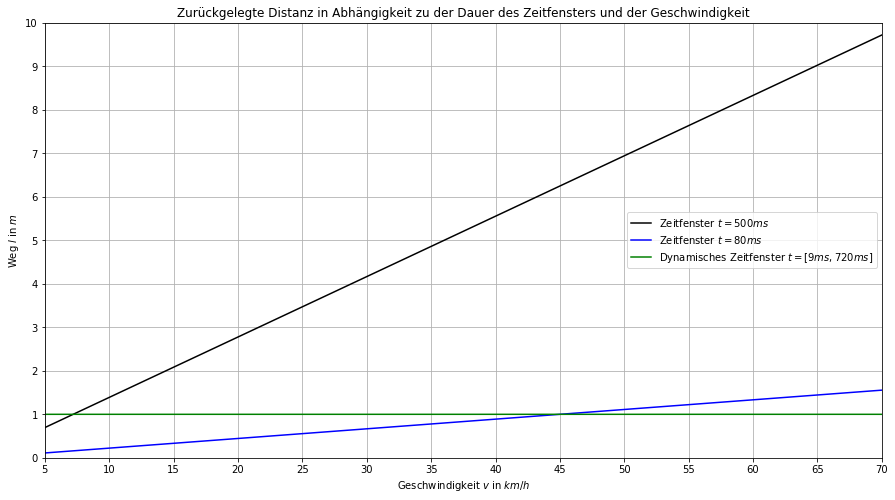

In [16]:
# Diagramm m / km/h abhängig von der Dauer t des Zeitfensters
kmhArray = np.arange(5.0, 70.1, 0.01)
plt.figure(figsize=(15,8))
timeframe500ms, = plt.plot(kmhArray, distanceTraveledStaticTimeframe(kmhArray,500.0), 'k', label='Zeitfenster $t=500ms$')
timeframe80ms, = plt.plot(kmhArray, distanceTraveledStaticTimeframe(kmhArray,80.0), 'b', label='Zeitfenster $t=80ms$')
dynamicTimeframe, = plt.plot(kmhArray, distanceTraveledDynamicTimeframe(kmhArray), 'g', label='Dynamisches Zeitfenster $t=[9ms,720ms]$')
plt.grid()
plt.xlabel('Geschwindigkeit $v$ in $km/h$')
plt.ylabel('Weg $l$ in $m$')
plt.xlim(5,70)
plt.ylim(0,10)
plt.xticks(np.arange(5.0, 70.01, 5.0))
plt.yticks(np.arange(0.0, 10.01, 1.0))
plt.title('Zurückgelegte Distanz in Abhängigkeit zu der Dauer des Zeitfensters und der Geschwindigkeit')
plt.legend(handles=[timeframe500ms,timeframe80ms,dynamicTimeframe], loc=5)
plt.savefig('timeframeLengthDiagram')
plt.show()

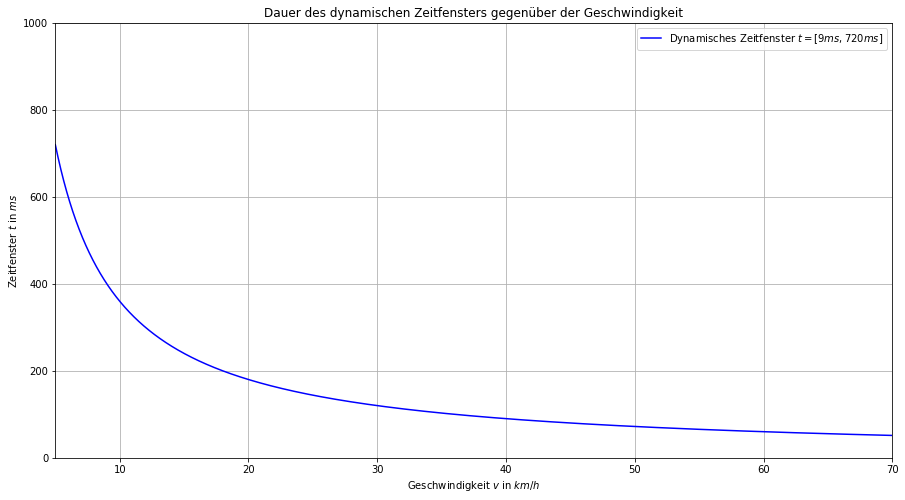

In [21]:
plt.figure(figsize=(15,8))
dynamicTimeframeLabel, = plt.plot(kmhArray, dynamicTimeframeCalcT(kmhArray), 'b', label='Dynamisches Zeitfenster $t=[9ms,720ms]$')
plt.grid()
plt.xlabel('Geschwindigkeit $v$ in $km/h$')
plt.ylabel('Zeitfenster $t$ in $ms$')
plt.xlim(5.0,70.0)
plt.ylim(0,1000)
plt.title('Dauer des dynamischen Zeitfensters gegenüber der Geschwindigkeit')
plt.legend(handles=[dynamicTimeframeLabel], loc=1)
plt.show()

In [212]:
def e(x):
    return 0.1 * np.exp(-x) 

In [18]:
distanceTraveledStaticTimeframe(18.0,80)

0.4